In [30]:
from pyhive import hive
from thrift import Thrift
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Log import logger

In [5]:
host_name = "localhost"
port = 10000
user = "neo"
password = "neo"
database="employee_db"

In [6]:
conn = hive.Connection(host=host_name, port=port, username=user, password=password,
                           database=database, auth='CUSTOM')
cur = conn.cursor()

In [48]:
cur.execute('CREATE TABLE IF NOT EXISTS user_data5(DateTime Timestamp,Cpu_Count INT,Cpu_Working_Time DOUBLE,Cpu_idle_Time DOUBLE,cpu_percent FLOAT,Usage_Cpu_Count INT,number_of_software_interrupts_since_boot INT,number_of_system_calls_since_boot INT,number_of_interrupts_since_boot INT,cpu_avg_load_over_1_min DOUBLE,cpu_avg_load_over_5_min DOUBLE,cpu_avg_load_over_15_min DOUBLE,system_total_memory BIGINT,system_used_memory BIGINT,system_free_memory BIGINT,system_active_memory BIGINT,system_inactive_memory BIGINT,system_buffers_memory BIGINT,system_cached_memory BIGINT,system_shared_memory BIGINT,system_avalible_memory BIGINT,disk_total_memory BIGINT,disk_used_memory BIGINT,disk_free_memory BIGINT,disk_read_count BIGINT,disk_write_count BIGINT,disk_read_bytes BIGINT,disk_write_bytes BIGINT,time_spent_reading_from_disk BIGINT,time_spent_writing_to_disk BIGINT,time_spent_doing_actual_IOs BIGINT,number_of_bytes_sent BIGINT,number_of_bytes_received BIGINT,number_of_packets_sent BIGINT,number_of_packets_recived BIGINT,total_number_of_errors_while_receiving BIGINT,total_number_of_errors_while_sending BIGINT,total_number_of_incoming_packets_which_were_dropped BIGINT,total_number_of_outgoing_packets_which_were_dropped BIGINT,boot_time Timestamp,user_name STRING,keyboard FLOAT,mouse INT,technology STRING,files_changed INT) ROW FORMAT DELIMITED FIELDS TERMINATED BY ","')

In [ ]:
cur.execute('LOAD DATA INPATH "hdfs://localhost:9000/spark_data/*.csv" OVERWRITE INTO TABLE user_data5')

In [127]:
df = pd.read_sql("select user_name, count(user_name) from user_data5 group by user_name", conn)

                      user_name  _c1
0  bhagyashrichalke21@gmail.com  482
1         damodharn21@gmail.com  253
2       deepshukla292@gmail.com  565
3            iamnzm@outlook.com  614
4     markfernandes66@gmail.com  508
5         rahilstar11@gmail.com  551
6      salinabodale73@gmail.com  569


In [59]:
cur.execute('select user_name, count(*) from user_data5 where keyboard !=0.0 or mouse!=0.0 group by user_name')
result = cur.fetchall()
print(result)

[('bhagyashrichalke21@gmail.com', 361), ('damodharn21@gmail.com', 191), ('deepshukla292@gmail.com', 475), ('iamnzm@outlook.com', 459), ('markfernandes66@gmail.com', 389), ('rahilstar11@gmail.com', 399), ('salinabodale73@gmail.com', 440), ('sharlawar77@gmail.com', 457)]


In [36]:
dataframe = pd.read_sql("select user_name, count(*) from user_data5 where keyboard !=0.0 or mouse!=0.0 group by user_name", conn)


In [99]:
print(dataframe)

                      user_name  _c1
0  bhagyashrichalke21@gmail.com  361
1         damodharn21@gmail.com  191
2       deepshukla292@gmail.com  475
3            iamnzm@outlook.com  459
4     markfernandes66@gmail.com  389
5         rahilstar11@gmail.com  399
6      salinabodale73@gmail.com  440
7         sharlawar77@gmail.com  457


In [39]:
dataframe['avg_secs']=(((dataframe['_c1']-1)*5)*60)/6

In [101]:
print(dataframe)

                      user_name  _c1  avg_secs
0  bhagyashrichalke21@gmail.com  361   18000.0
1         damodharn21@gmail.com  191    9500.0
2       deepshukla292@gmail.com  475   23700.0
3            iamnzm@outlook.com  459   22900.0
4     markfernandes66@gmail.com  389   19400.0
5         rahilstar11@gmail.com  399   19900.0
6      salinabodale73@gmail.com  440   21950.0
7         sharlawar77@gmail.com  457   22800.0


In [13]:
dataframe['avg_hour'] = pd.to_datetime( dataframe['avg_secs'], unit='s').dt.strftime("%H:%M")
dataframe = dataframe.drop(['_c1','avg_secs'], axis=1)
print(dataframe)

                      user_name avg_hour
0  bhagyashrichalke21@gmail.com    05:00
1         damodharn21@gmail.com    02:38
2       deepshukla292@gmail.com    06:35
3            iamnzm@outlook.com    06:21
4     markfernandes66@gmail.com    05:23
5         rahilstar11@gmail.com    05:31
6      salinabodale73@gmail.com    06:05
7         sharlawar77@gmail.com    06:20


In [40]:
username= dataframe['user_name']
work=dataframe['avg_secs']


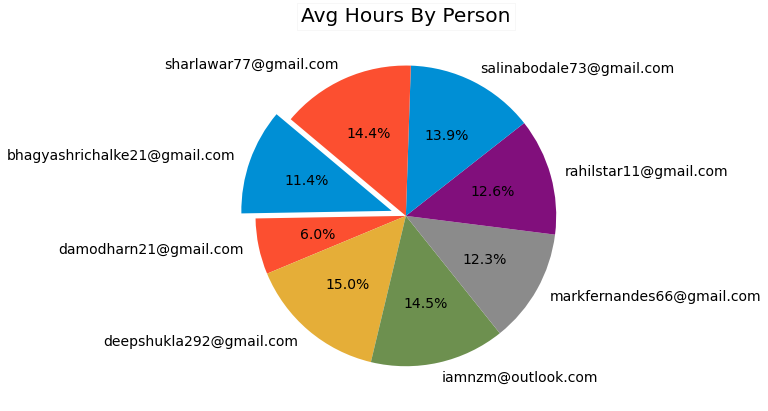

In [41]:
try:
    plt.style.use("fivethirtyeight")
    fig = plt.figure(figsize=(6,12))
    fig.patch.set_facecolor('w')
    explode = (0.1, 0, 0, 0, 0, 0, 0, 0)
    plt.pie(work,labels=username,autopct='%1.1f%%',startangle=140,explode= explode)
    plt.title('Avg Hours By Person',bbox={'facecolor':'1', 'pad':4})

except Exception as e:
    logger.info(e)

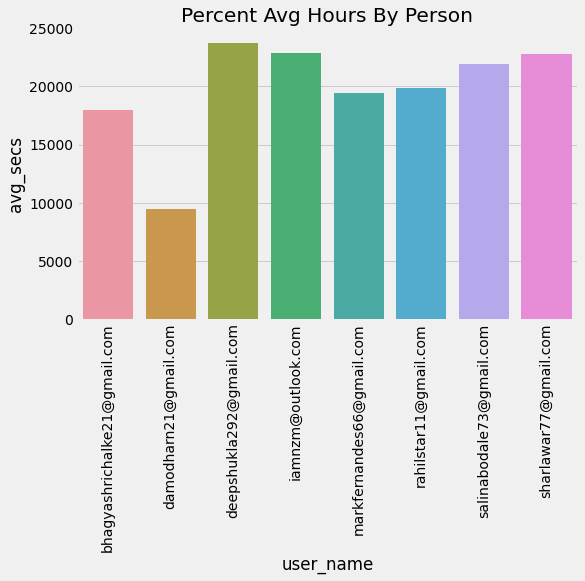

In [42]:
try:
    df = dataframe
    plt.figure(figsize = (8,5))
    sns.barplot(x = 'user_name',y='avg_secs',data = df)
    plt.title("Percent Avg Hours By Person")
    plt.ylim(0,25000)
    plt.xticks(rotation='vertical')
    plt.show()
except Exception as e:
    logger.error(e)

In [15]:
dataframe = dataframe.sort_values(by=['avg_hour'],ascending=False)
print(dataframe)

                      user_name avg_hour
2       deepshukla292@gmail.com    06:35
3            iamnzm@outlook.com    06:21
7         sharlawar77@gmail.com    06:20
6      salinabodale73@gmail.com    06:05
5         rahilstar11@gmail.com    05:31
4     markfernandes66@gmail.com    05:23
0  bhagyashrichalke21@gmail.com    05:00
1         damodharn21@gmail.com    02:38


In [14]:
dataframe1 = dataframe.sort_values(by=['avg_hour'])
print(dataframe1)

                      user_name avg_hour
1         damodharn21@gmail.com    02:38
0  bhagyashrichalke21@gmail.com    05:00
4     markfernandes66@gmail.com    05:23
5         rahilstar11@gmail.com    05:31
6      salinabodale73@gmail.com    06:05
7         sharlawar77@gmail.com    06:20
3            iamnzm@outlook.com    06:21
2       deepshukla292@gmail.com    06:35


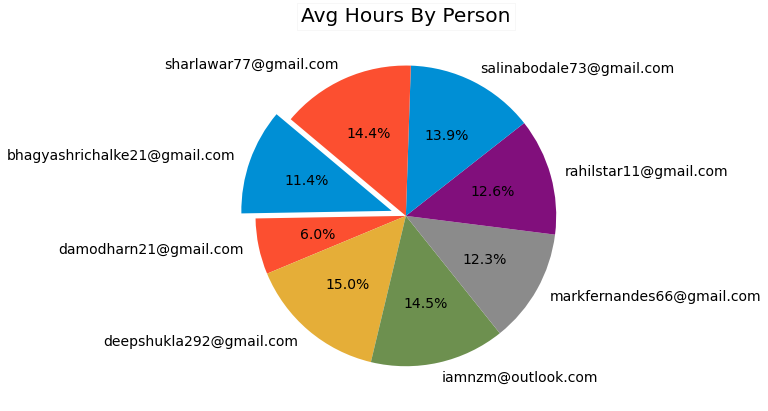

In [43]:
try:
    plt.style.use("fivethirtyeight")
    fig = plt.figure(figsize=(6,12))
    fig.patch.set_facecolor('w')
    explode = (0.1, 0, 0, 0, 0, 0, 0, 0)
    plt.pie(work,labels=username,autopct='%1.1f%%',startangle=140,explode= explode)
    plt.title('Avg Hours By Person',bbox={'facecolor':'1', 'pad':4})

except Exception as e:
    logger.info(e)

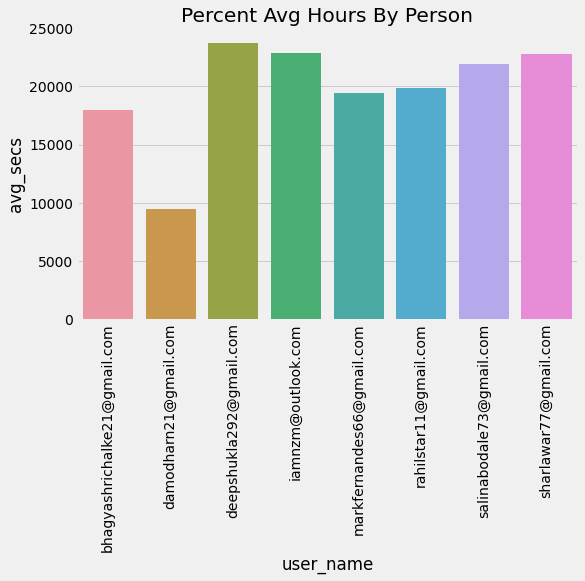

In [44]:
try:
    df = dataframe
    plt.figure(figsize = (8,5))
    sns.barplot(x = 'user_name',y='avg_secs',data = df)
    plt.title("Percent Avg Hours By Person")
    plt.ylim(0,25000)
    plt.xticks(rotation='vertical')
    plt.show()
except Exception as e:
    logger.error(e)

In [46]:
dataframe3 = pd.read_sql("select user_name, count(user_name) from user_data5 where keyboard == 0.0 and mouse == 0.0 group by user_name", conn)


In [20]:
print(dataframe3)

                      user_name  _c1
0  bhagyashrichalke21@gmail.com  121
1         damodharn21@gmail.com   62
2       deepshukla292@gmail.com   90
3            iamnzm@outlook.com  155
4     markfernandes66@gmail.com  119
5         rahilstar11@gmail.com  152
6      salinabodale73@gmail.com  129
7         sharlawar77@gmail.com  123


In [47]:
dataframe3['idle_secs']=(((dataframe3['_c1']-1)*5)*60)/6
print(dataframe3)

                      user_name  _c1  idle_secs
0  bhagyashrichalke21@gmail.com  121     6000.0
1         damodharn21@gmail.com   62     3050.0
2       deepshukla292@gmail.com   90     4450.0
3            iamnzm@outlook.com  155     7700.0
4     markfernandes66@gmail.com  119     5900.0
5         rahilstar11@gmail.com  152     7550.0
6      salinabodale73@gmail.com  129     6400.0
7         sharlawar77@gmail.com  123     6100.0


In [ ]:
dataframe3['idle_hour'] = pd.to_datetime( dataframe3['idle_secs'], unit='s').dt.strftime("%H:%M")
dataframe3 = dataframe3.drop(['_c1','idle_secs'], axis=1)

In [28]:
dataframe3 = dataframe3.sort_values(by=['idle_hour'])
print(dataframe3)

                      user_name idle_hour
1         damodharn21@gmail.com     00:50
2       deepshukla292@gmail.com     01:14
4     markfernandes66@gmail.com     01:38
0  bhagyashrichalke21@gmail.com     01:40
7         sharlawar77@gmail.com     01:41
6      salinabodale73@gmail.com     01:46
5         rahilstar11@gmail.com     02:05
3            iamnzm@outlook.com     02:08


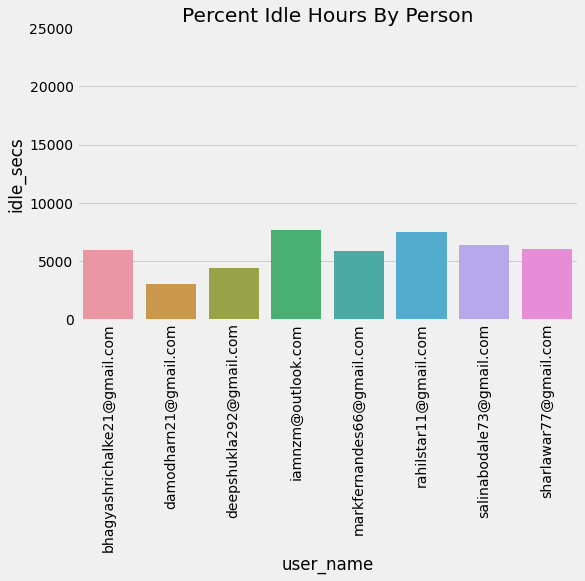

In [54]:
try:
    df = dataframe3
    plt.figure(figsize = (8,5))
    sns.barplot(x = 'user_name',y='idle_secs',data = df)
    plt.title("Percent Idle Hours By Person")
    plt.ylim(0,25000)
    plt.xticks(rotation='vertical')
    plt.show()
except Exception as e:
    logger.error(e)

In [51]:
username= dataframe3['user_name']
work=dataframe3['idle_secs']

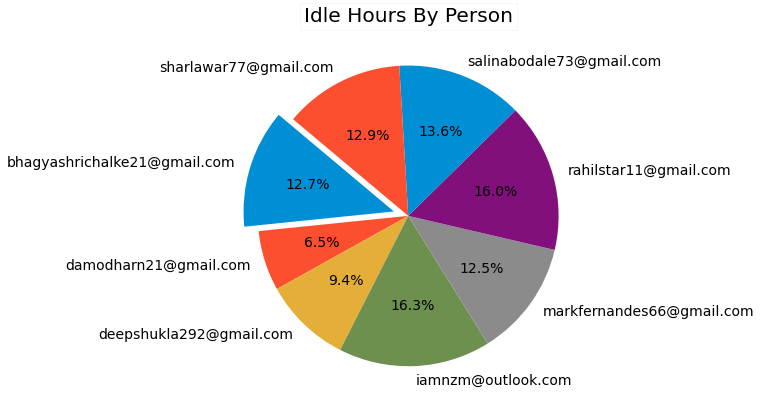

In [53]:
try:
    plt.style.use("fivethirtyeight")
    fig = plt.figure(figsize=(6,12))
    fig.patch.set_facecolor('w')
    explode = (0.1, 0, 0, 0, 0, 0, 0, 0)
    plt.pie(work,labels=username,autopct='%1.1f%%',startangle=140,explode= explode)
    plt.title('Idle Hours By Person',bbox={'facecolor':'1', 'pad':4})

except Exception as e:
    logger.info(e)